In [117]:
from icecube import dataio
import histlite as hl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [118]:
#old data distributions

In [176]:
old_i3 = dataio.I3File('/data/user/ssclafani/cscd-filter/old_data/Level3_IC86.2022_Run00137496_SMT12.i3.zst')

In [158]:
new_i3_list = glob.glob('/data/user/ssclafani/cscd-filter/data/Run00138808/*')

In [159]:
fr = dataio.I3File(new_i3_list[0]).pop_physics()

In [160]:
filter ={}
keys = fr['OnlineFilterMask'].keys()
for k in keys:
    filter[k] = fr['OnlineFilterMask'][k].condition_passed

In [138]:
from icecube.online_filterscripts.online_filters.trigger_filters import online_software_smt_retrigger

In [156]:
from icecube import icetray
from icecube.icetray import I3Tray

output_i3 = '/data/user/ssclafani/cscd-filter/old_data/Level3_IC86.2022_Run00137496_SMT12.i3.zst'

tray = I3Tray()
tray.AddModule("I3Reader", Filename='/data/user/ssclafani/cscd-filter/old_data/Level3_IC86.2022_Run00137496.i3.zst')
tray.AddSegment(online_software_smt_retrigger, 'SMT12')
tray.AddModule("I3Writer", "EventWriter",
               FileName=output_i3,
               Streams=[icetray.I3Frame.TrayInfo,
                        icetray.I3Frame.DAQ,
                        icetray.I3Frame.Physics,
                        icetray.I3Frame.Stream('S'),
                        icetray.I3Frame.Stream('M')],
               DropOrphanStreams=[icetray.I3Frame.DAQ,
                                  icetray.I3Frame.TrayInfo,
                                  icetray.I3Frame.Stream('S'),
                                  icetray.I3Frame.Stream('Q'),
                                  icetray.I3Frame.Stream('M')]
               )
tray.Execute()

NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


In [164]:
fr = old_i3.pop_physics()

In [193]:
fr['SoftwareSMT12Filt_23'].value

True

In [162]:
new_zen = []
new_azi = [] 
new_energy = []
new_event_time = []
frames = []
new_tag = []
new_spe_azi = []
toposplit = []
new_filter = {}
new_spe_zen = []
new_runtime = []
new_event_deltat = []
for i, new_i3 in enumerate(sorted(new_i3_list)):
    f = dataio.I3File(new_i3)
    try:
        f.rewind()
    except RuntimeError:
        print('skipping {}'.format(new_i3))
    j=0
    while f.more():
        #try:
        fr = f.pop_physics()
        #except RuntimeError:
        #    print('slipping {}'.format(new_i3))
        j +=1
        new_energy.append(fr['L3_MonopodFit4_AmptFit'].energy)
        new_zen.append(fr['L3_MonopodFit4_AmptFit'].dir.zenith)
        new_azi.append(fr['L3_MonopodFit4_AmptFit'].dir.azimuth)
        toposplit.append(fr['Cscd_Topo_HLCSplitCount'].value)
        new_spe_zen.append(fr['CscdL3_SPEFit16'].dir.zenith)
        new_spe_azi.append(fr['CscdL3_SPEFit16'].dir.zenith)
        header = fr['I3EventHeader']
        new_event_time.append(header.start_time)
        new_event_deltat.append(header.end_time - header.start_time)
        new_tag.append( fr['Cscd_Cont_Tag'])
        new_runtime.append(fr['CascadeL3_0000_SegmentTimer_seconds'].value)
        new_filter ={}
        keys = fr['OnlineFilterMask'].keys()
        for k in keys:
            new_filter[k] = fr['OnlineFilterMask'][k].condition_passed
    frames.append(j)

In [177]:
old_zen = []
old_azi = [] 
old_energy = []
old_spe_zen = []
old_spe_azi = []
old_toposplit = []
old_event_time = []
old_tag = []
old_event_deltat = []
old_i3.rewind()
old_filter = {}
smt_12 = []
while old_i3.more():
    fr = old_i3.pop_physics()
    old_energy.append(fr['L3_MonopodFit4_AmptFit'].energy)
    old_zen.append(fr['L3_MonopodFit4_AmptFit'].dir.zenith)
    old_azi.append(fr['L3_MonopodFit4_AmptFit'].dir.azimuth)
    old_spe_zen.append(fr['CscdL3_SPEFit16'].dir.zenith)
    old_spe_azi.append(fr['CscdL3_SPEFit16'].dir.zenith)
    old_toposplit.append(fr['CscdL2_Topo_HLCSplitCount'].value)
    smt_12.append(fr['SoftwareSMT12Filt_23'])
    header = fr['I3EventHeader']
    old_event_time.append(header.start_time)
    old_event_deltat.append(header.end_time - header.start_time)

    old_tag.append(fr['CscdL3_Cont_Tag'])
    old_filter ={}
    keys = fr['FilterMask'].keys()
    for k in keys:
        old_filter[k] = fr['FilterMask'][k].condition_passed

In [190]:
smt_12

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

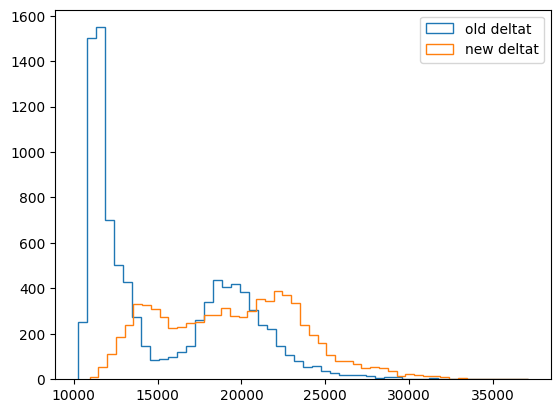

In [179]:
plt.hist(old_event_deltat, histtype='step', bins=50, label='old deltat');
plt.hist(new_event_deltat, histtype='step', bins=50, label='new deltat');
plt.legend()

Text(0, 0.5, 'Events')

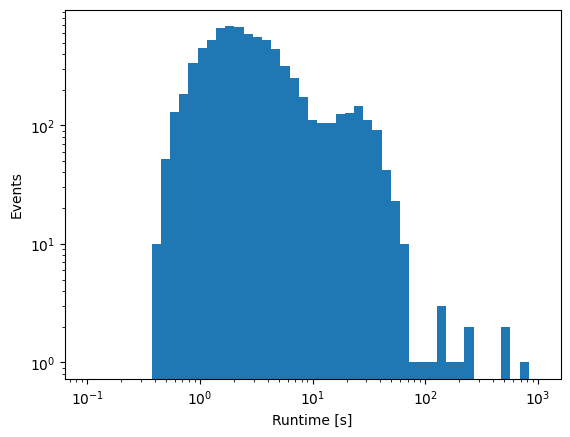

In [180]:
plt.hist(new_runtime, bins=np.logspace(-1,3,50))
plt.loglog()
plt.xlabel('Runtime [s]')
plt.ylabel('Events')


Text(0.5, 1.0, 'New')

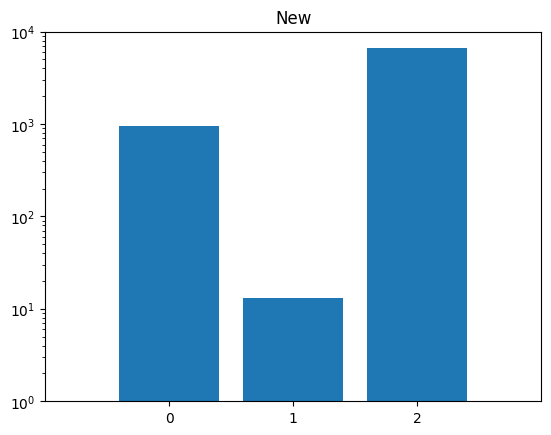

In [181]:
t = []
for i in range(len((new_tag))):
    t.append(new_tag[i].value)
values, bins = np.histogram(t)
plt.bar([0,1,2], [949,13,6597])
plt.xlim(-1,3)
plt.xticks([0,1,2])
plt.semilogy()
plt.ylim(1,1e4)
plt.title('New')

Text(0.5, 1.0, 'Old')

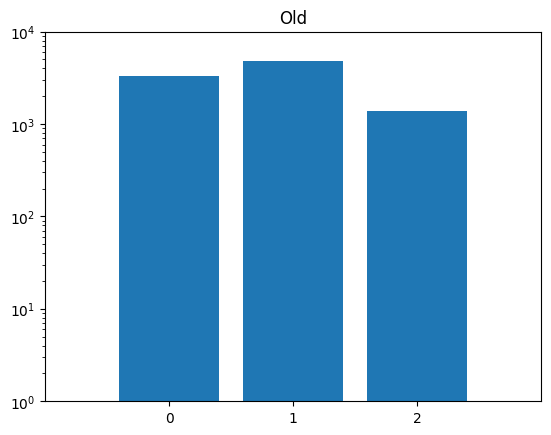

In [182]:
t = []
for i in range(len((old_tag))):
    t.append(old_tag[i].value)
    values, bins = np.histogram(t)
plt.bar([0,1,2], [3354,4778,1391])
plt.xlim(-1,3)
plt.xticks([0,1,2])
plt.semilogy()
plt.ylim(1,1e4)
plt.title('Old')

Text(0.5, 0, 'TopoSplit Split Count')

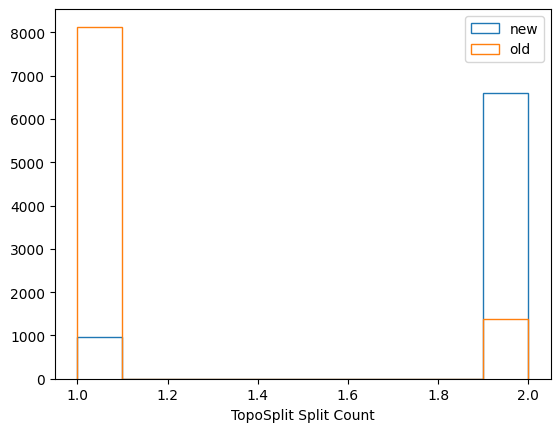

In [183]:
plt.hist(toposplit, histtype='step', label='new')
plt.hist(old_toposplit, histtype='step', label='old')
plt.legend()
plt.xlabel('TopoSplit Split Count')

In [184]:
print(old_event_time[0].date_time)
print(old_event_time[-1].date_time)
print('Events: {}'.format(len(old_event_time)))
rate = len(old_event_time)/(8.*60.*60.)
print('Old Rate : {:.2}Hz'.format(rate))

2023-01-01 00:02:22.903281+00:00
2023-01-01 08:02:15.666619+00:00
Events: 9523
Old Rate : 0.33Hz


In [185]:
len(new_event_time)

7559

In [186]:
print(new_event_time[0].date_time)
print(new_event_time[-1].date_time)
print('Events: {}'.format(len(new_event_time)))
rate = len(new_event_time)/(8.*60.*60.)
print('New Rate : {:.2}Hz'.format(rate))

2024-01-01 00:01:47.722242+00:00
2024-01-01 08:01:45.217148+00:00
Events: 7559
New Rate : 0.26Hz


In [187]:
.26/.33

0.7878787878787878

Text(0.5, 0, 'E-reco [GeV]')

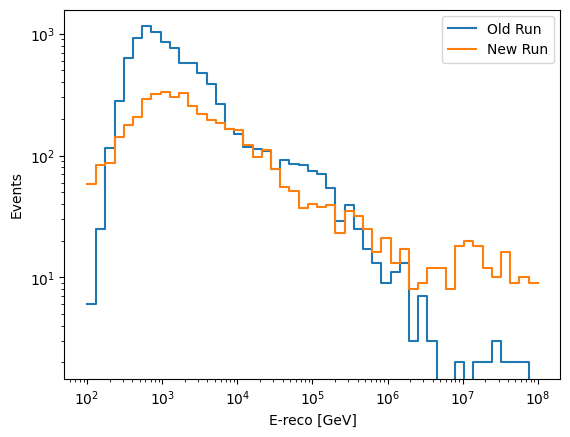

In [188]:
fig, ax = plt.subplots()

h1 = hl.hist(old_energy, bins=np.logspace(2,8,50))
hl.plot1d(ax, h1, label='Old Run')
h2 = hl.hist(new_energy, bins=np.logspace(2,8,50))
hl.plot1d(ax, h2, label='New Run')
ax.legend()

ax.loglog()
ax.set_ylabel('Events')
ax.set_xlabel('E-reco [GeV]')

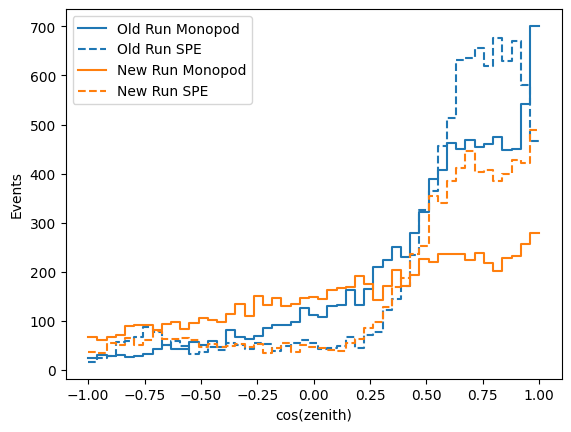

In [189]:
fig, ax = plt.subplots()
h = hl.hist(np.cos(old_zen), bins=np.linspace(-1,1,50))
hl.plot1d(ax, h, color='C0', ls='-', label='Old Run Monopod')
h = hl.hist(np.cos(old_spe_zen), bins=np.linspace(-1,1,50))
hl.plot1d(ax, h, color='C0', ls='--', label='Old Run SPE')
h = hl.hist(np.cos(new_zen), bins=np.linspace(-1,1,50))
hl.plot1d(ax, h, color='C1', ls='-', label='New Run Monopod')
h = hl.hist(np.cos(new_spe_zen), bins=np.linspace(-1,1,50))
hl.plot1d(ax, h, color='C1', ls='--', label='New Run SPE')
ax.set_ylabel('Events')
ax.set_xlabel('cos(zenith)')
ax.legend()

In [ ]:
fig, ax = plt.subplots()

h = hl.hist(np.degrees(old_azi), bins=np.linspace(0,360,50))
hl.plot1d(ax, h, color='C0', ls='-', label='Old Run Monopod')
#h = hl.hist(np.degrees(old_spe_azi), bins=np.linspace(0,360,50))
#hl.plot1d(ax, h, color='C0', ls='--', label='Old Run SPE')
h = hl.hist(np.degrees(new_azi), bins=np.linspace(0,360,50))
hl.plot1d(ax, h, color ='C1', ls='-', label='New Run Monopod')
#h = hl.hist(np.degrees(new_spe_azi), bins=np.linspace(0,360,50))
#hl.plot1d(ax, h, color='C1', ls='--', label='New Run SPE')
ax.set_ylim(0)
ax.set_ylabel('Events')
ax.set_xlabel('azimuth [deg]')
ax.legend()